# Eye Health Analysis With Machine Learning Models
**Datasets :** https://www.kaggle.com/datasets/arifmia/sleep-health-and-digital-screen-exposure-dataset

**Author   :** Fajar Laksono 

**Github   :** http://fajarlaksono.github.io/

## Introduction

### Analysis Plan

1. Exploratory Data Analysis (EDA) 
    - Understanding the dataset
    - Understanding Trendliness
    - Understanding Correlation
    - Proposing suitable machine learning models
2. Feature Engineering
    - Handling Null and Duplicate data
    - Creating new informative feature
    - Handling any multicolinearity issues
    - Encoding Categorical Data 
    - Scaling numerical features
3. Machine Learning Models Evaluation Selection
    - Defining machine learnings models
    - Splitting Training and Test Data
    - Evaluating performance with accuracy, precision, recal, andd F1-score
5. Feature Importance Analysis
    - Getting feature importance
6. Conlusion
    - Concluding the analysis

### Table of Contents
1. [Analysis Plan](#analysis-plan)
2. [Import Libraries](#import-libraries)
3. [Load and Transform](#load-and-transform)
    1. [Download datasets](#download-datasets)
    2. [Load datasets](#load-datasets)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
    1. [Understanding Datasets](#understanding-datasets)
        1. [Dataset Preview](#dataset-preview)
        2. [Dataset Info](#dataset-info)
        3. [Summary Statistics](#summary-statistics)
        4. [Missing Values](#missing-values)
        5. [Check For Duplication](#check-for-duplication)
        6. [Summary](#summary)
    2. [Understanding Pattern and Trendliness](#understanding-pattern-and-trendliness)
        1. [Preparation](#preparation)
            1. [Data Splitting](#data-splitting)
            2. [Categorical Encoding](#categorical-encoding)
        2. [Review](#review)
            1. [Info](#info)
            2. [Describe](#describe)
            3. [Data Preview](#data-preview)
    3. [Correlation Analysis](#correlation-analysis)
    4. [Distribution Analysis](#distribution-analysis)
    5. [Conclusion](#conclusion)
5. [Machine Learning Models Selection](#machine-learning-models-selection)
    1. [Import Libraries](#import-libraries-1)
    2. [Define Models](#define-models)
    3. [Splitting Training and Testing Data](#splitting-training-and-testing-data)
    4. [Standard Scaling](#standard-scaling)
    5. [Model Training and Evaluation](#model-training-and-evaluation)
    6. [Performance Comparison and Evaluation](#performance-comparison-and-evaluation)
    7. [Choosing Best Model](#choosing-best-model)
    8. [Feature Importances](#feature-importances)
6. [Conclusion](#conclusion-1)

## Preparation

### Import Libraries

In [ ]:
# import libraries
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

# configurations
pd.set_option('future.no_silent_downcasting', True) # control the silence of downcast data type in future version
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set this to the number of cores you want to use

# Print version of the libraries
print("Kagglehub Version: " + kagglehub.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("matplotlib Version: " + matplotlib.__version__)
print("Numpy Version: " + np.__version__)

Kagglehub Version: 0.3.8
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
matplotlib Version: 3.9.3
Numpy Version: 1.26.4


### Download datasets

In [ ]:
# Download latest version of datasets
path = kagglehub.dataset_download("arifmia/sleep-health-and-digital-screen-exposure-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\arifmia\sleep-health-and-digital-screen-exposure-dataset\versions\1


### Load datasets

In [ ]:
# load Dry_Eye_Dataset.csv dataset
dry_eye_ds = pd.read_csv(os.path.join(path, "Dry_Eye_Dataset.csv"))
dry_eye_ds = pd.DataFrame(dry_eye_ds)

## Exploratory Data Analysis

Hereby, We are understanding the datasets, its pattern, relationships, and handle identified issues.

### Understanding Datasets

#### Dataset Preview

In [ ]:
print(dry_eye_ds.head(5))

  Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        N   
1          60        12000                 74     164  ...        N   
2          95        12000                 93     179  ...        N   
3          78        19000                 32     160  ...        N   
4          72         4000                173     179  ...        N   

  Medical issue Ongoing medication Smart device before bed  \
0             Y                  Y              

#### Dataset Info

In [ ]:
print("Shape: ", dry_eye_ds.shape)
print("Info: ")
print(dry_eye_ds.info())

Shape:  (20000, 26)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  ob

#### Summary Statistics

In [ ]:
print(dry_eye_ds.describe())

                Age  Sleep duration  Sleep quality  Stress level  \
count  20000.000000    20000.000000   20000.000000  20000.000000   
mean      31.422800        6.998245       2.997250      2.993750   
std        8.103717        1.731723       1.412283      1.407235   
min       18.000000        4.000000       1.000000      1.000000   
25%       24.000000        5.500000       2.000000      2.000000   
50%       31.000000        7.000000       3.000000      3.000000   
75%       39.000000        8.500000       4.000000      4.000000   
max       45.000000       10.000000       5.000000      5.000000   

         Heart rate   Daily steps  Physical activity        Height  \
count  20000.000000  20000.000000       20000.000000  20000.000000   
mean      79.912200  10536.900000          90.069750    174.865900   
std       11.808279   5752.729186          52.317283     14.719903   
min       60.000000   1000.000000           0.000000    150.000000   
25%       70.000000   6000.000000    

#### Missing Values

In [ ]:
print(dry_eye_ds.isnull().sum())

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64


#### Check For Duplication

In [ ]:
print('Number of duplicate rows:', dry_eye_ds.duplicated().sum())

Number of duplicate rows: 0


#### Summary

> - The datasets doesn't represent time-series
>
> - No missing value
>
> - No Duplication data
>
> - Blood pressure needs to be splited as Syntolic and Diastolic 
>
> - Categorical columns need to be encoded into numeric

### Understanding Pattern and Trendliness

#### Preparation

Prepare the data to optimize the visualization.

##### Data Splitting

In [ ]:
# Splitting Blood pressure
dry_eye_ds[['Systolic', 'Diastolic']] = dry_eye_ds['Blood pressure'].str.split('/', expand=True)
dry_eye_ds['Systolic'] = pd.to_numeric(dry_eye_ds['Systolic'])
dry_eye_ds['Diastolic'] = pd.to_numeric(dry_eye_ds['Diastolic'])

# Drop Blood pressure columns
dry_eye_ds.drop(columns=['Blood pressure'], inplace=True)

##### Categorical Encoding

In [ ]:
# labelencoder = LabelEncoder()
categorical_columns=[
    'Gender', 
    'Smoking', 
    'Ongoing medication', 
    'Smart device before bed', 
    'Sleep disorder', 
    'Wake up during night',
    'Feel sleepy during day',
    'Caffeine consumption',
    'Alcohol consumption',
    'Blue-light filter',
    'Discomfort Eye-strain',
    'Redness in eye',
    'Itchiness/Irritation in eye',
    'Dry Eye Disease',
    'Medical issue']
for col in categorical_columns:
    # dry_eye_ds[col] = labelencoder.fit_transform(dry_eye_ds[col].astype(str))
    dry_eye_ds[col] = dry_eye_ds[col].replace({'Y': 1, 'N': 0, 'M': 1, 'F': 0}).infer_objects(copy=False).astype(np.int64) # Use .replace, manual intervention to make it easier to read

> **Changes**
>
> 'Yes': 1
>
> 'No': 0
>
> 'Male': 1
> 
> 'Female': 0

#### Review

Review the prepared data.

##### Info

In [ ]:
print(dry_eye_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  int64  
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Heart rate                   20000 non-null  int64  
 6   Daily steps                  20000 non-null  int64  
 7   Physical activity            20000 non-null  int64  
 8   Height                       20000 non-null  int64  
 9   Weight                       20000 non-null  int64  
 10  Sleep disorder               20000 non-null  int64  
 11  Wake up during night         20000 non-null  int64  
 12  Feel sleepy during day       20000 non-null  int64  
 13  Caffeine consump

##### Describe

In [ ]:
print(dry_eye_ds.describe())

             Gender           Age  Sleep duration  Sleep quality  \
count  20000.000000  20000.000000    20000.000000   20000.000000   
mean       0.501400     31.422800        6.998245       2.997250   
std        0.500011      8.103717        1.731723       1.412283   
min        0.000000     18.000000        4.000000       1.000000   
25%        0.000000     24.000000        5.500000       2.000000   
50%        1.000000     31.000000        7.000000       3.000000   
75%        1.000000     39.000000        8.500000       4.000000   
max        1.000000     45.000000       10.000000       5.000000   

       Stress level    Heart rate   Daily steps  Physical activity  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean       2.993750     79.912200  10536.900000          90.069750   
std        1.407235     11.808279   5752.729186          52.317283   
min        1.000000     60.000000   1000.000000           0.000000   
25%        2.000000     70.000000   6

##### Data Preview

In [ ]:
print(dry_eye_ds.head())

   Gender  Age  Sleep duration  Sleep quality  Stress level  Heart rate  \
0       0   24             9.5              2             1          67   
1       1   39             9.6              2             3          60   
2       0   45             5.4              1             5          95   
3       0   45             5.4              4             5          78   
4       0   42             5.7              3             2          72   

   Daily steps  Physical activity  Height  Weight  ...  Ongoing medication  \
0         3000                 31     161      69  ...                   1   
1        12000                 74     164      87  ...                   1   
2        12000                 93     179      94  ...                   0   
3        19000                 32     160      77  ...                   0   
4         4000                173     179      99  ...                   0   

   Smart device before bed  Average screen time  Blue-light filter  \
0         

#### Correlation Analysis

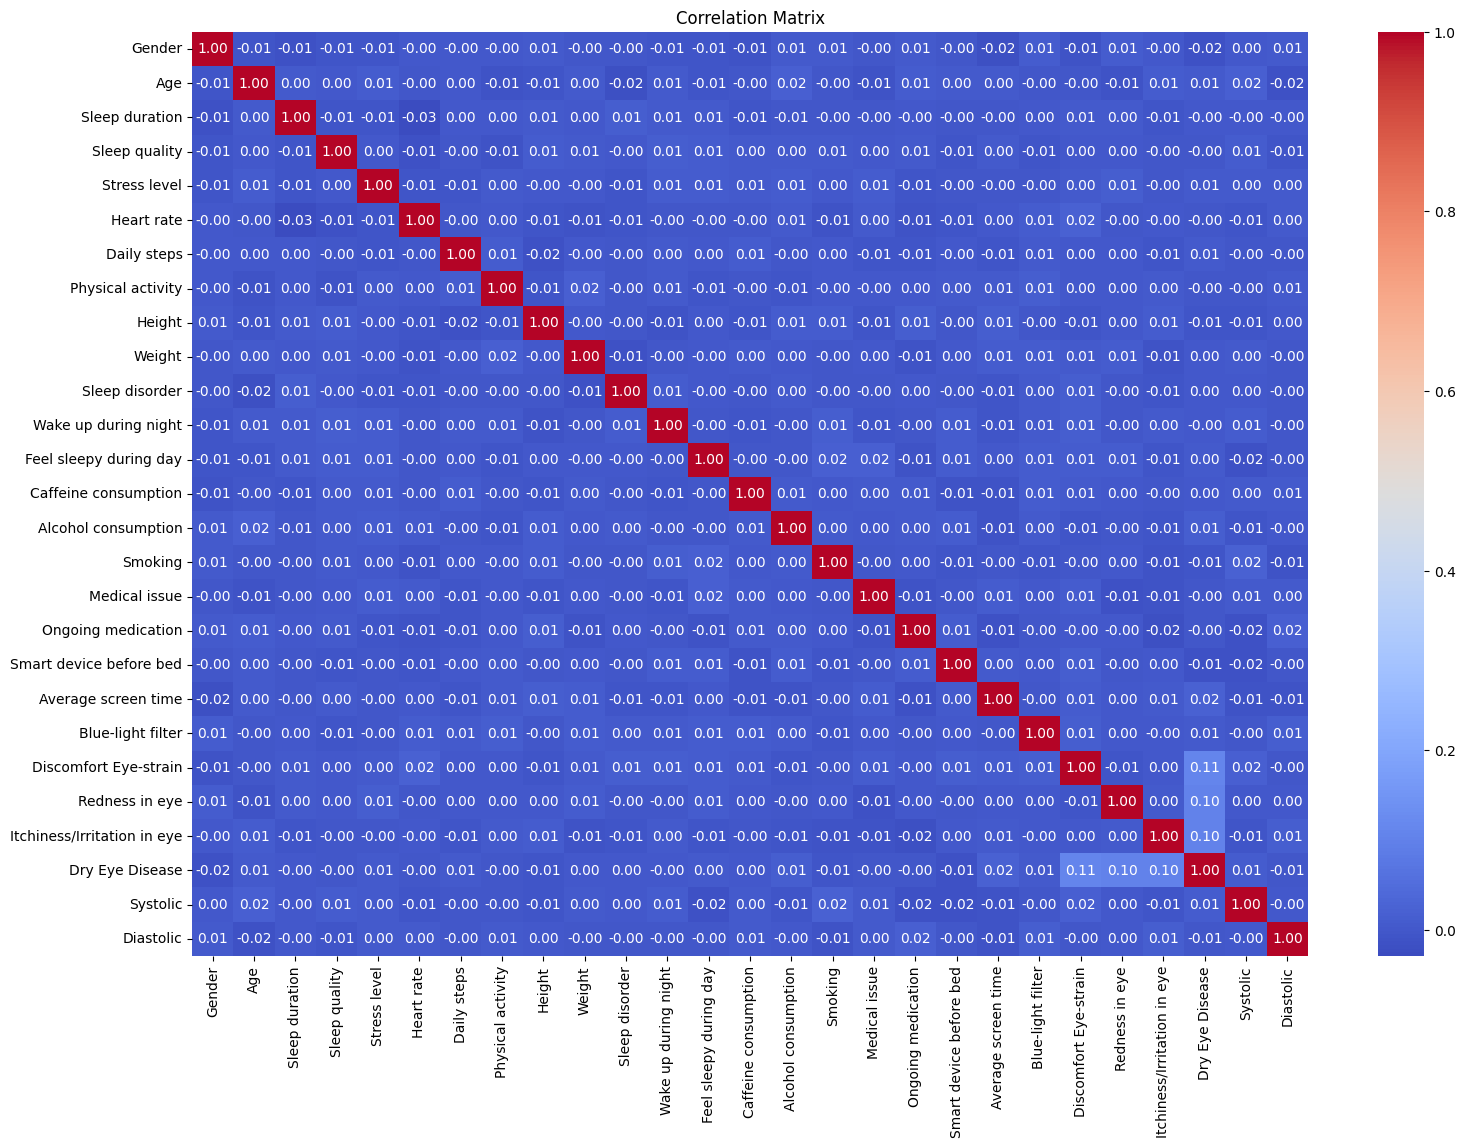

In [ ]:
# Select only numeric columns
numeric_cols = dry_eye_ds.select_dtypes(include=['float64', 'float32','int64', 'int32'])

# Compute the correlation matrix
corr = numeric_cols.corr()
# upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# threshold = 0.1
# high_corr = upper_tri[(upper_tri >= threshold) | upper_tri <= - threshold]

# Generate a heatmap
plt.figure(figsize=(18, 12))
# sns.heatmap(high_corr, annot=True, fmt='.2f', cmap='coolwarm', mask=high_corr.isnull())
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> **Summary:**
> 
> - Graph indicates that there is no strong linear relationship between variables.
>
> - **Further Relationship analysis is not required**

#### Distribution Analysis

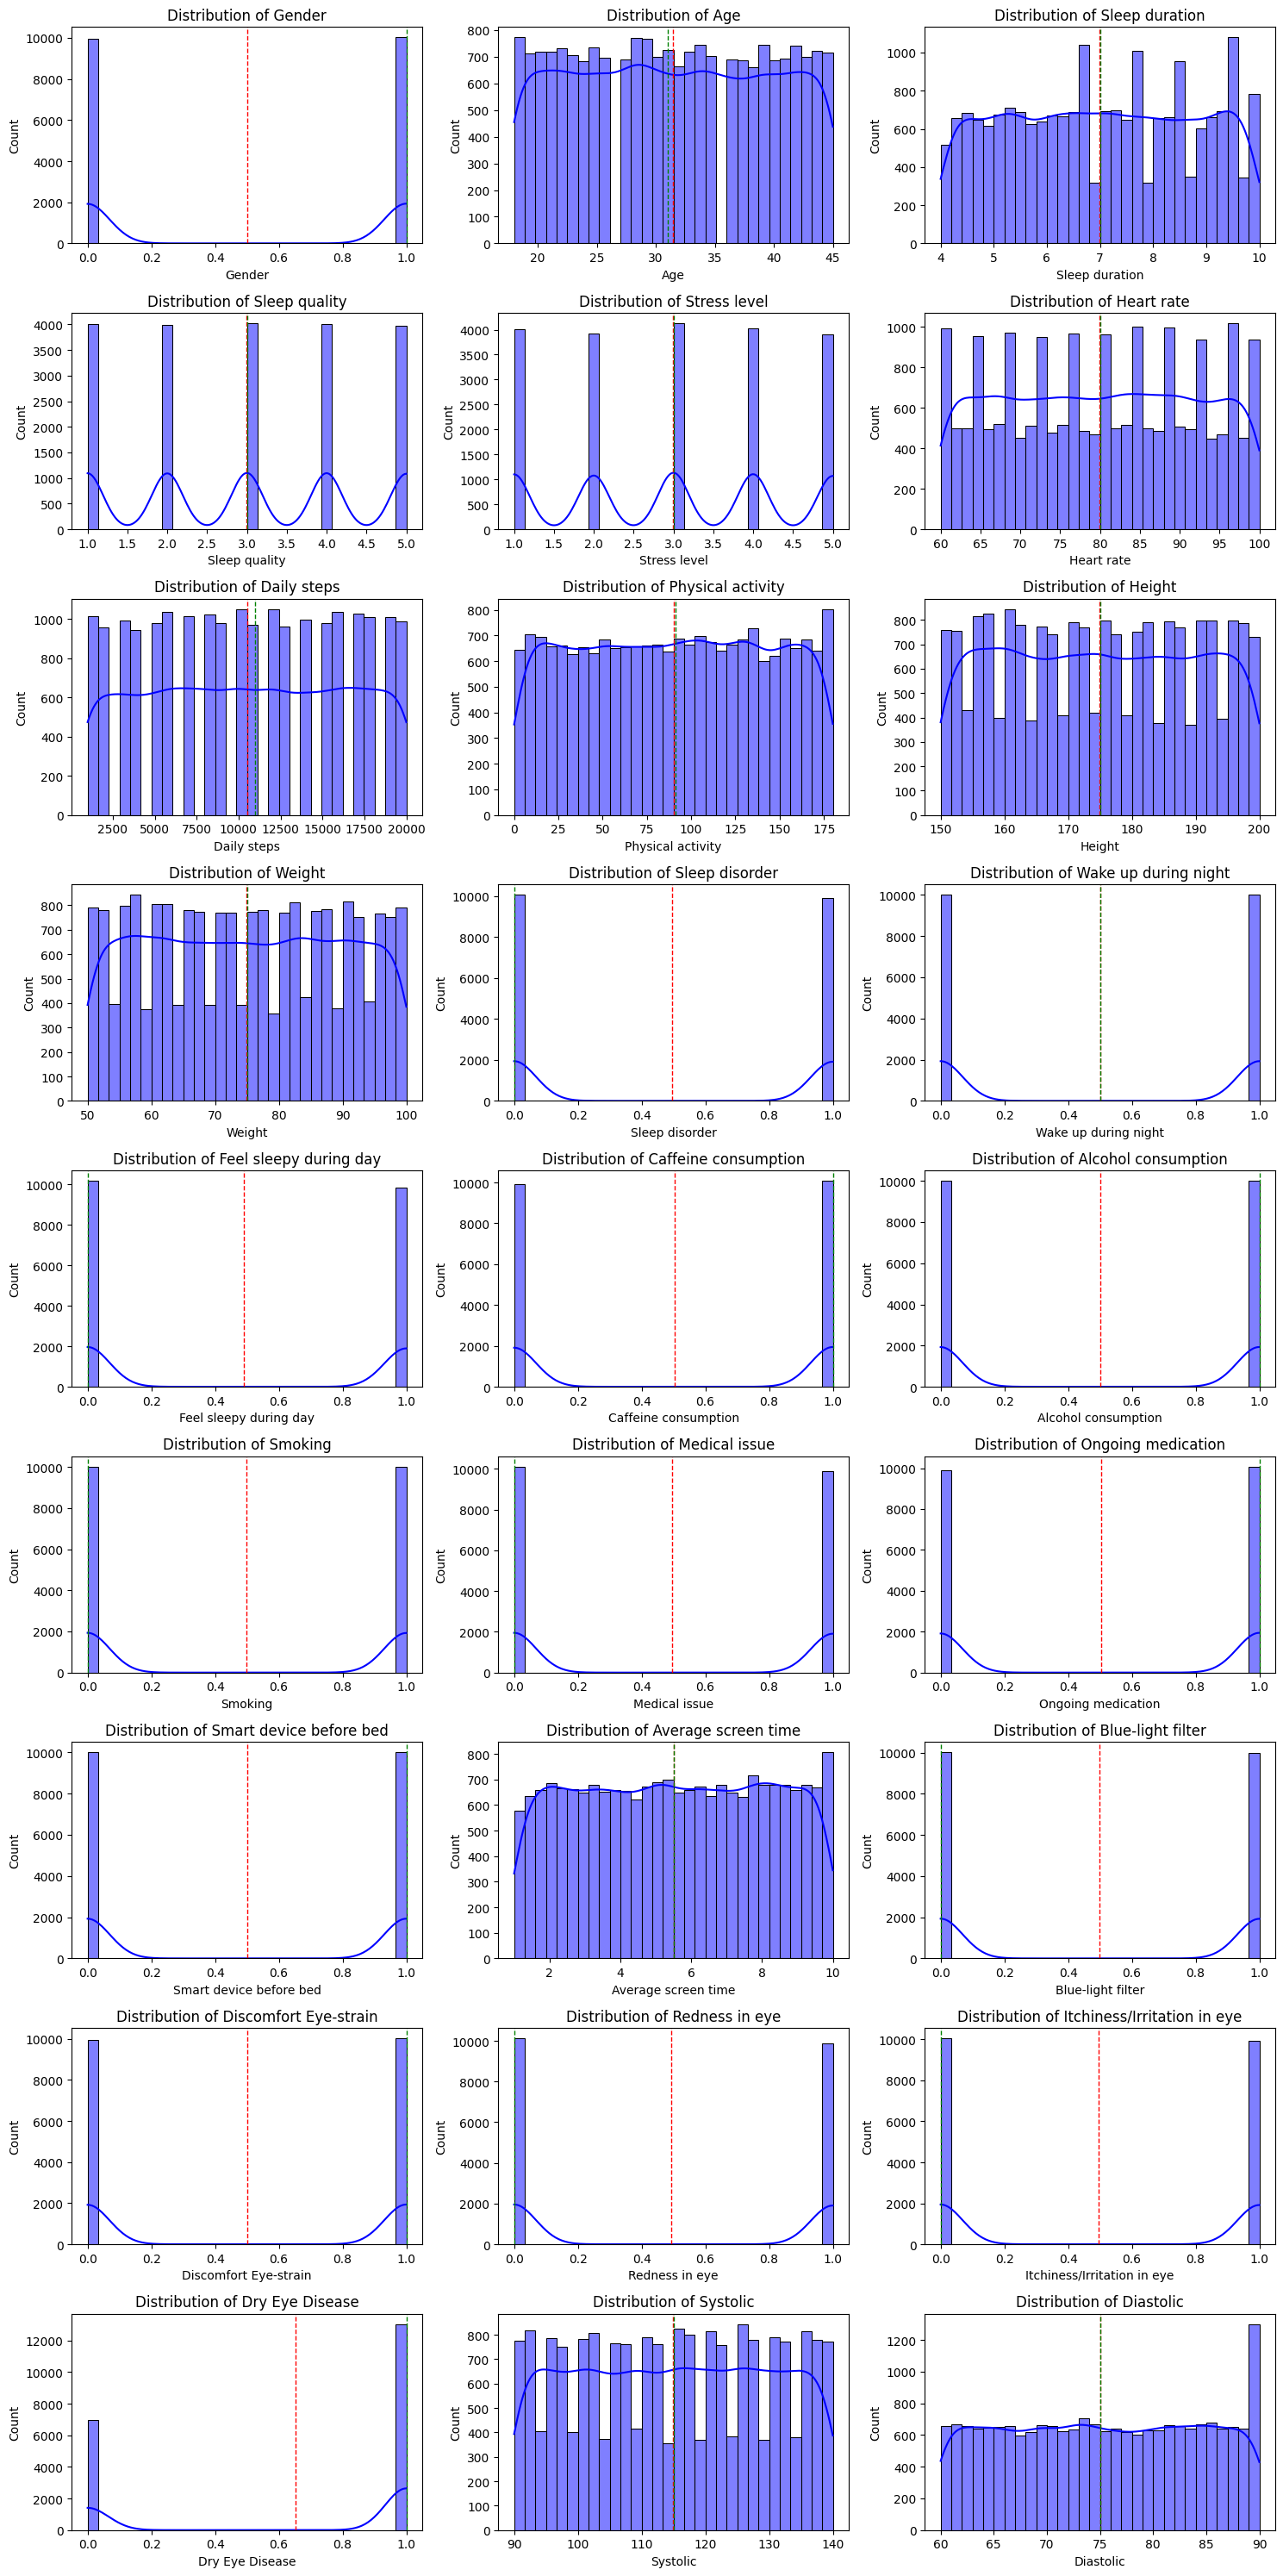

In [ ]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(numeric_cols[:27], 1):
    plt.subplot(9, 3, i)
    sns.histplot(dry_eye_ds[col], kde=True, bins=30, color="blue")
    plt.axvline(dry_eye_ds[col].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(dry_eye_ds[col].median(), color='green', linestyle='dashed', linewidth=1)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#### Summary


> 1. Categorical Variables
>       - Features such as gender, sleep disorder, smoking, caffeine consumption, alcohol consumption, ongoing medication, discomfort eye strain, redness in eye, itchiness/irritation in eye, and blue-light filter usage are binary (0 or 1). The distribution is equal between 2 different choices.
> 2. Continuous Variables
>       - **Age:** The distribution appears fairly uniform with a central tendency around 30 years old.
>       - **Sleep Duration:** The distribution is approximately normal, centered around 7–8 hours, which aligns with recommended sleep duration.
>       - **Heart Rate:** Appears to follow a roughly normal distribution, with a peak around 75–80 BPM.
>       - **Daily Steps and Physical Activity:** Show fairly uniform distributions, suggesting a wide variation in activity levels.
>       - **Height and Weight:** Display expected distributions, roughly resembling normal distributions.
>       - **Systolic and Diastolic Blood Pressure:** Follow standard physiological distributions, indicating a healthy range for most individuals.
>       - **Screen Time:** Appears relatively uniform, meaning usage varies widely among individuals. 

### Conclusion

During the predictive analysis, it appeared that there is no correlation between variables. Therefore we will use machine learning models that can capture non-linear relationships.
 
| ML Models | Type | Works well for | Definition |
| --------- | ---- | -------------- | ---------- |
| Decision Trees | Supervised (Tree-Based) | Classification, Regression | A tree-like model that splits data based on features to make decisions. |
| Random Forests | Ensemble (Bagging) | Classification, Regression | An ensemble of multiple decision trees that improves accuracy and reduces overfitting. |
| Logistic Regression | Supervised (Linear) | Binary Classification | A statistical method for binary classification problems. |
| Naïve Bayes | Probabilistic | Text Classification, Spam Detection | A probabilistic classifier based on Bayes' theorem, assuming feature independence. | 
| Gradient Boosting Machines (GBM) | Ensemble (Boosting) | Classification, Regression | An ensemble learning technique that builds models sequentially to correct errors. |
| XGBoost | Ensemble (Boosting) | Large Datasets, Classification | An optimized version of gradient boosting designed for speed and performance. |
| AdaBoost | Ensemble (Boosting) | Classification, Regression | A boosting algorithm that combines weak learners to create a strong classifier. |
| Support Vector Machines (SVM) | Supervised (Kernel-Based) | High-dimensional data, Classification | A model that finds the best boundary (hyperplane) to separate data into classes. | 
| K-Nearest Neighbors (KNN) | Instance-Based | Classification, Regression | A simple algorithm that classifies data based on the majority vote of nearby points. |


## Machine Learning Models Selection

### Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

import shap

### Define Models

In [ ]:
ml_models = { # supervised learning
    'DecisionTrees': DecisionTreeClassifier(random_state=42),
    'RandomForests': RandomForestClassifier(n_estimators=100, random_state=42), 
    'LogisticRegression': LogisticRegression(max_iter=2000), 
    'NaiveBayes': GaussianNB(),
    'GradientBoostingMachinesBGM': GradientBoostingClassifier(n_estimators=100, random_state=42), 
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SupportVectorMachinesSVM': SVC(kernel='rbf', probability=True),
    'KNearestNeighborKNN': KNeighborsClassifier(n_neighbors=5)
}

### Splitting Training and Testing Data

separating the features and target variable, and then splitting the data into training and testing sets, ensuring the target variable's distribution is maintained in both sets.

In [ ]:
ml_X = numeric_cols.drop(columns=['Dry Eye Disease'])
ml_Y = numeric_cols['Dry Eye Disease']

ml_X_train, ml_X_test, ml_Y_train, ml_Y_test = train_test_split(ml_X, ml_Y, test_size=0.2, random_state=537, stratify=ml_Y)

### Standard Scaling
standardizing the features in the training and testing sets by scaling them to have a mean of 0 and a standard deviation of 1 using StandardScaler.

In [ ]:
scaler = StandardScaler()
ml_X_train = scaler.fit_transform(ml_X_train)
ml_X_test = scaler.transform(ml_X_test)

### Model Training and Evaluation

Train and evaluate the dataset.

DecisionTrees Training time:  0.2005317211151123
DecisionTrees Report:
               precision    recall  f1-score   support

           0       0.37      0.38      0.38      1393
           1       0.67      0.66      0.66      2607

    accuracy                           0.56      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.56      0.56      0.56      4000

RandomForests Training time:  3.1480202674865723
RandomForests Report:
               precision    recall  f1-score   support

           0       0.67      0.24      0.35      1393
           1       0.70      0.94      0.80      2607

    accuracy                           0.69      4000
   macro avg       0.68      0.59      0.57      4000
weighted avg       0.69      0.69      0.64      4000

LogisticRegression Training time:  0.014976978302001953
LogisticRegression Report:
               precision    recall  f1-score   support

           0       0.67      0.15      0.24      1393
         

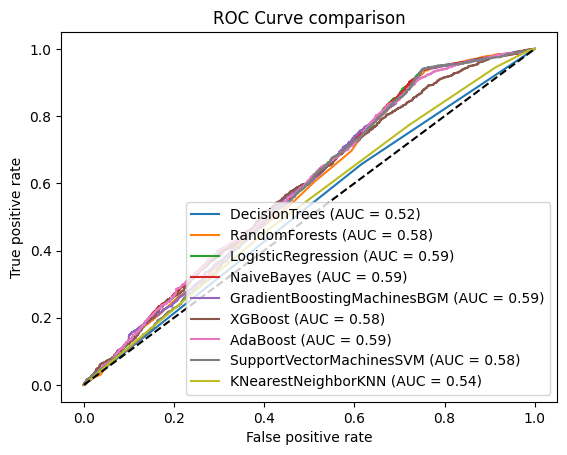

In [ ]:
performance_accuracy = {}
performance_execution_time = {}
for ml_model_name, ml_model in ml_models.items():
    start_time = time.time()

    if ml_model_name in ['LightGBM']:
        ml_model.fit(ml_X_train, ml_Y_train, feature_name='auto')
    else:
        ml_model.fit(ml_X_train, ml_Y_train)

    ml_Y_prediction = ml_model.predict(ml_X_test)
    ml_Y_probability = ml_model.predict_proba(ml_X_test)[:, 1] #ROC-AUC

    end_time = time.time()
    execution_time = end_time - start_time

    accuracy = accuracy_score(ml_Y_test, ml_Y_prediction)
    report = classification_report(ml_Y_test, ml_Y_prediction)

    performance_accuracy[ml_model_name] = accuracy
    performance_execution_time[ml_model_name] = execution_time

    print(f"{ml_model_name} Training time: ", execution_time)
    print(f"{ml_model_name} Report:\n", report)

    # ROC Curve
    false_positive_rates, true_positive_rate, _ = roc_curve(ml_Y_test, ml_Y_probability)
    roc_auc = auc(false_positive_rates, true_positive_rate)

    plt.plot(false_positive_rates, true_positive_rate, label=f"{ml_model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve comparison")
plt.legend()
plt.show()

> **Summary** 
> - ROC Curve (Receiver Operating Characteristic) shows you how well your model does at different "levels of confidence" (thresholds). It plots the True Positive Rate (how often the model correctly predicts something as positive) against the False Positive Rate (how often the model incorrectly predicts something as positive). 
> - A single number that summarizes the overall performance of a classification model.
> - Best Performing Models (Highest AUC ~0.59): Naïve Bayes, Logistic Regression, Gradient Boosting (GBM), AdaBoost
> - Overall, The score is considered weak and not much better than random guesssing.

### Performance Comparison and Evaluation

Model Accuracy Comparison:
> SupportVectorMachinesSVM Accuracy = 0.6993
> GradientBoostingMachinesBGM Accuracy = 0.6980
> RandomForests Accuracy = 0.6930
> LogisticRegression Accuracy = 0.6780
> NaiveBayes Accuracy = 0.6780
> AdaBoost Accuracy = 0.6720
> XGBoost Accuracy = 0.6468
> KNearestNeighborKNN Accuracy = 0.6010
> DecisionTrees Accuracy = 0.5620

Model Execution Time Comparison:
> NaiveBayes Execution Time = 0.0146
> LogisticRegression Execution Time = 0.0150
> DecisionTrees Execution Time = 0.2005
> XGBoost Execution Time = 0.3652
> KNearestNeighborKNN Execution Time = 0.3810
> AdaBoost Execution Time = 1.6966
> GradientBoostingMachinesBGM Execution Time = 2.7916
> RandomForests Execution Time = 3.1480
> SupportVectorMachinesSVM Execution Time = 114.5143


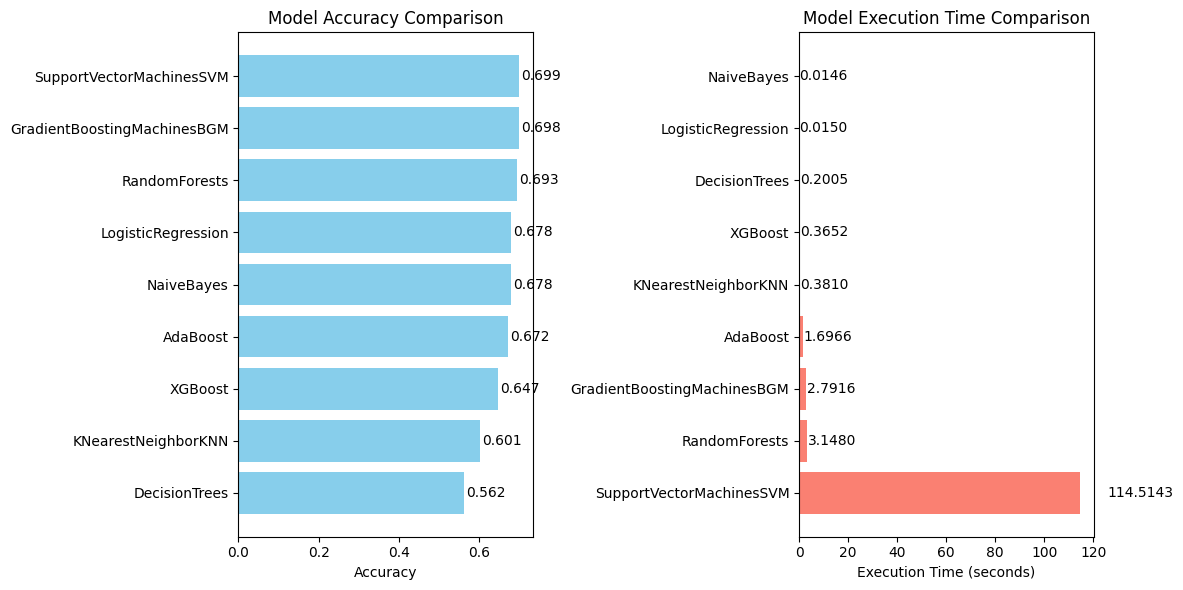

In [ ]:
sorted_performance_accuracy = sorted(performance_accuracy.items(), key=lambda x: x[1], reverse=True)
sorted_performance_execution_time = sorted(performance_execution_time.items(), key=lambda x: x[1])

accuracy_models = []
accuracy_values = []
exec_time_models = []
exec_time_values = []

print("Model Accuracy Comparison:")
for model, value in sorted_performance_accuracy:
    print(f'> {model} Accuracy = {value:.4f}')
    accuracy_models.append(model)
    accuracy_values.append(value)

print("\nModel Execution Time Comparison:")
for model, value in sorted_performance_execution_time:
    print(f'> {model} Execution Time = {value:.4f}')    
    exec_time_models.append(model)
    exec_time_values.append(value)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].barh(accuracy_models, accuracy_values, color='skyblue')
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].invert_yaxis() 
for i, v in enumerate(accuracy_values):
    axes[0].text(v + 0.005, i, f"{v:.3f}", va='center')

axes[1].barh(exec_time_models, exec_time_values, color='salmon')
axes[1].set_xlabel('Execution Time (seconds)')
# axes[1].set_xscale('log') 
axes[1].set_title('Model Execution Time Comparison')
axes[1].invert_yaxis()
for i, v in enumerate(exec_time_values):
    axes[1].text(v * 1.1, i, f"{v:.4f}", va='center')

plt.tight_layout()
plt.show()


> **Summary**
> - Support vector Machines (SVM) is the best model in its performance with score of 0.699. In the contrast, Decision Trees is the least with a score of 0.562.
> - Naive Bayes is the fastest model in the Time of Execution. However, Support Vector Machine is the slowest and 100 times slower compared to others.

### Choosing Best Model

Choosing best models with this preferences:

In [ ]:
accuracy_weight = 0.7
exec_time_weight = 0.3

Use the preferences against the score get final score.

In [ ]:
models = np.array(list(performance_accuracy.keys()))
accuracy_values = np.array(list(performance_accuracy.values()))
exec_time_values = np.array(list(performance_execution_time.values()))

normalized_accuracy = (accuracy_values - accuracy_values.min()) / (accuracy_values.max() - accuracy_values.min())
normalized_exec_time = 1 - (exec_time_values - exec_time_values.min()) / (exec_time_values.max() - exec_time_values.min())

final_score = (normalized_accuracy * accuracy_weight) + (normalized_exec_time * exec_time_weight)

df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy_values,
    "Execution Time": exec_time_values,
    "Normalized Accuracy": normalized_accuracy,
    "Normalized Execution Time": normalized_exec_time,
    "Final Score": final_score
})

# Sort by Best Score
df = df.sort_values(by="Final Score", ascending=False)

# Display the ranked models
print(df)

                         Model  Accuracy  Execution Time  Normalized Accuracy  \
4  GradientBoostingMachinesBGM   0.69800        2.791600             0.990893   
1                RandomForests   0.69300        3.148020             0.954463   
3                   NaiveBayes   0.67800        0.014599             0.845173   
2           LogisticRegression   0.67800        0.014977             0.845173   
6                     AdaBoost   0.67200        1.696598             0.801457   
5                      XGBoost   0.64675        0.365234             0.617486   
7     SupportVectorMachinesSVM   0.69925      114.514255             1.000000   
8          KNearestNeighborKNN   0.60100        0.380990             0.284153   
0                DecisionTrees   0.56200        0.200532             0.000000   

   Normalized Execution Time  Final Score  
4                   0.975747     0.986349  
1                   0.972634     0.959914  
3                   1.000000     0.891621  
2            

> **Summary**
> 
> Support Vector Machine SVM is the best ML Model for this dataset.

### Feature Importances

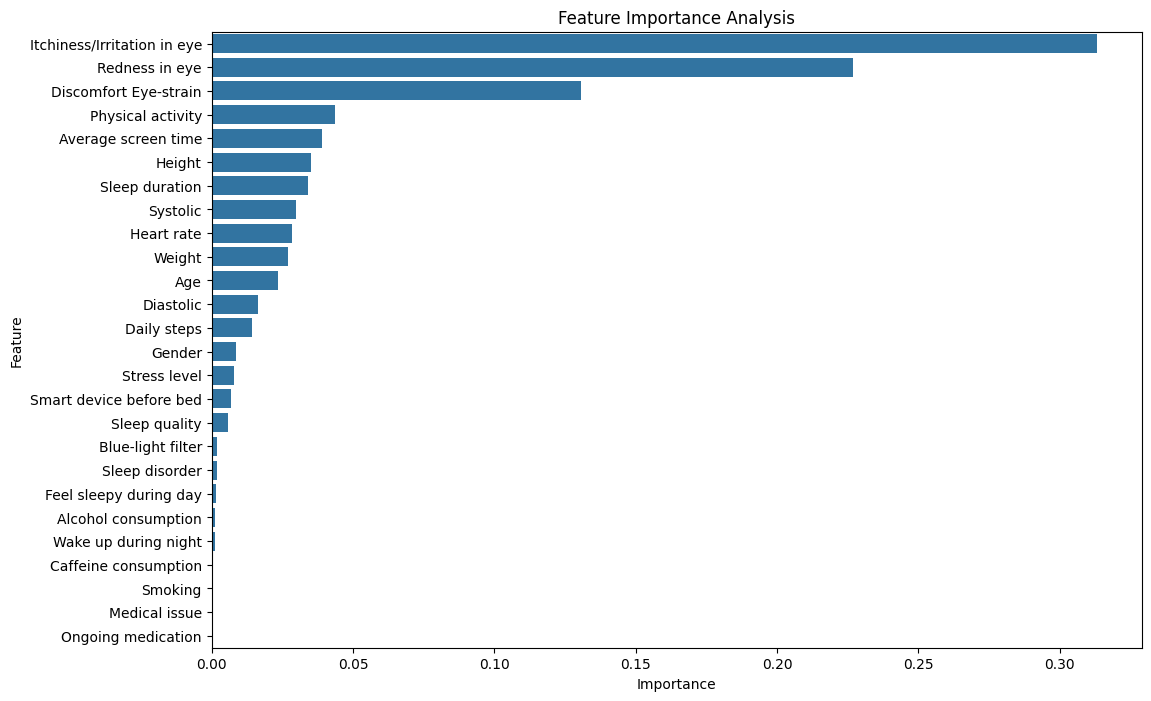

                        Feature  Importance
23  Itchiness/Irritation in eye    0.313328
22               Redness in eye    0.226966
21        Discomfort Eye-strain    0.130679
7             Physical activity    0.043783
19          Average screen time    0.038873
8                        Height    0.035274
2                Sleep duration    0.034124
24                     Systolic    0.029833
5                    Heart rate    0.028536
9                        Weight    0.027064
1                           Age    0.023603
25                    Diastolic    0.016345
6                   Daily steps    0.014163
0                        Gender    0.008703
4                  Stress level    0.007740
18      Smart device before bed    0.006985
3                 Sleep quality    0.005866
20            Blue-light filter    0.001826
10               Sleep disorder    0.001719
12       Feel sleepy during day    0.001673
14          Alcohol consumption    0.001316
11         Wake up during night 

In [ ]:
# Feature Importance Analysis
importances = ml_models['GradientBoostingMachinesBGM'].feature_importances_
features = ml_X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Analysis')
plt.show()

print(feature_importance_df)

> **Summary**
> 
> - Top Predictors: The most influential features оказались "Itchiness/Irritation in eye" (0.313), "Redness in eye" (0.227), and "Discomfort Eye-strain" (0.131).  These three features alone account for over 67% of the explained variance in the model, highlighting the strong relationship between these subjective symptoms.

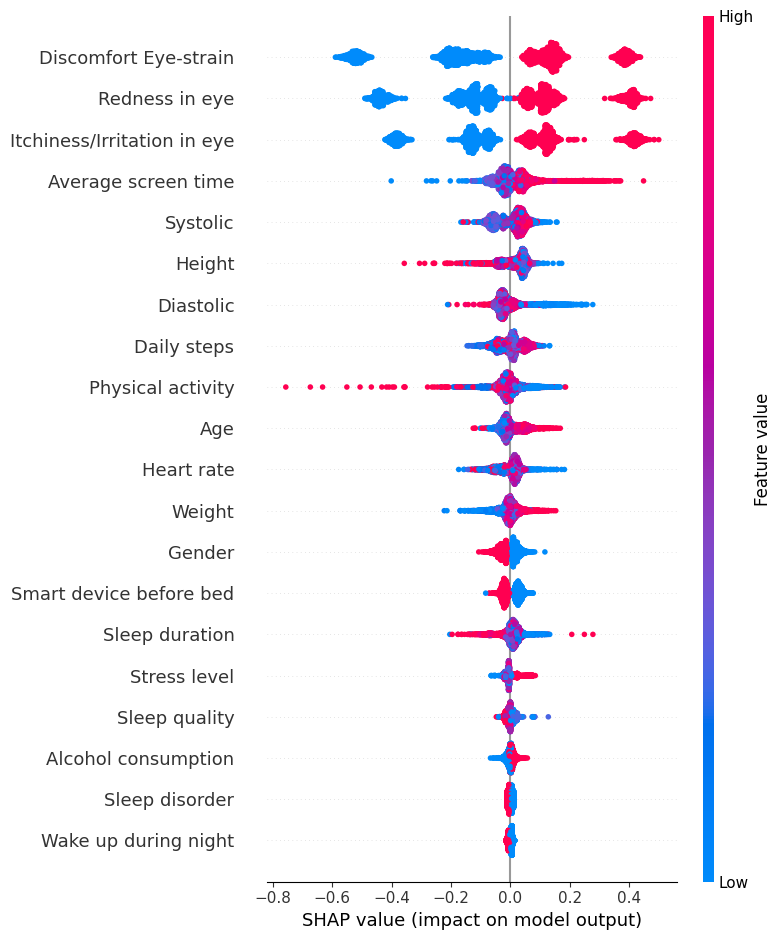

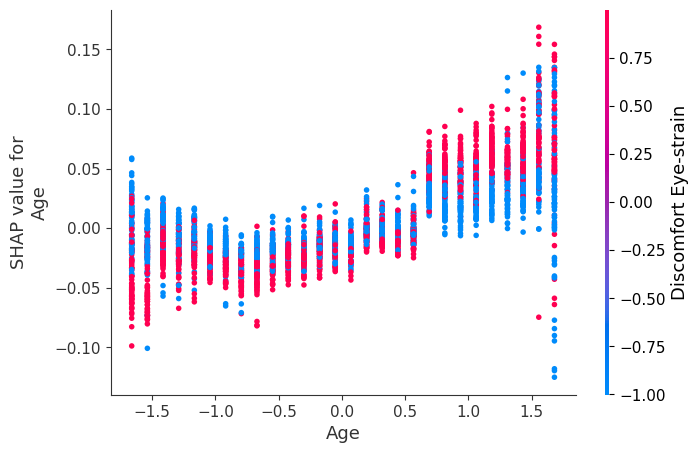

In [ ]:
# Initialize the SHAP explainer
explainer = shap.Explainer(ml_models['GradientBoostingMachinesBGM'], ml_X_train, feature_names=ml_X.columns)

# Calculate SHAP values
shap_values = explainer(ml_X_test, check_additivity=False)

# Convert shap_values to numpy array
shap_values_array = shap_values.values

# Plot SHAP summary plot
shap.summary_plot(shap_values, ml_X_test, feature_names=ml_X.columns)

# Plot SHAP dependence plot for a specific feature
shap.dependence_plot("Age", shap_values_array, ml_X_test, feature_names=ml_X.columns)

> **Summary**
>
> -  Each plot organizes features by their importance, with the most influential ones at the top. The color gradient represents the feature value (from low to high), and the position of the points indicates the feature's impact on the model's prediction.
> - The plot tells us that as people get older, the model predicts a higher risk of [eye issue]. However, this effect is much stronger for people who also experience significant eye discomfort.  Age plays less of a role for those with low discomfort levels. However, It can also be concluded that Screen Time exposure is a strong derterminator of Eye Disease.

### Conclusion

- The analysis highlight the importance of understanding the Eye and Sleep health, and the relationship of the variable.
- Discomfort Eye-strain, Redness in eye, iritation, and Screen time exposure are significant determinators that influence Eye Disease.
- It shows that Gradient Boosting Machines (BGM) is the best performer among other Machine learning models.
- Further optimization and inclussion of addditional features couldd improve prediction accuracy and model robustness.
- It is recommended to expoler additional models and hyperparameter tuning techniques, and incoperating new data sources related to the topic. 